In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score,r2_score
from pandas import DataFrame

In [2]:
FLT_1 = pd.read_excel('FLT 1 Revised.xlsx')
data = FLT_1.drop(columns='t(s)').drop(columns='true speed (m/s)')
data

,aoa (deg),pitch (deg),pitch speed (deg/s),Cd,Cl,Cm
0,1.978644,1.994105,0.009835,0.050988,0.460989,0.001941
1,1.978343,1.994686,0.009787,0.050972,0.461021,0.001953
2,1.978041,1.995267,0.009738,0.050956,0.461052,0.001966
3,1.977740,1.995847,0.009690,0.050941,0.461083,0.001978
4,1.977439,1.996428,0.009642,0.050925,0.461115,0.001990
...,...,...,...,...,...,...
99995,2.391689,2.924688,-0.012253,0.043411,0.416994,-0.004519
99996,2.391753,2.924688,-0.012253,0.043395,0.416750,-0.004529
99997,2.391817,2.924688,-0.012253,0.043379,0.416508,-0.004539
99998,2.391882,2.924688,-0.012253,0.043364,0.416266,-0.004549


In [3]:
x = data[0:(len(data)-1)]
y = data[1:(len(data))]

from sklearn.model_selection import train_test_split
x_main, x_test, y_main, y_test = train_test_split (x,y, test_size=10000)
x_training, x_validation, y_training, y_validation = train_test_split(x_main,y_main, test_size=10000)
print(x_test.shape)
print(y_test.shape)

print(x_validation.shape)
print(y_validation.shape)

print(x_training.shape)
print(y_training.shape)

x_test = DataFrame.sort_index(x_test, ignore_index= True)
y_test = DataFrame.sort_index(y_test, ignore_index= True)

x_validation = DataFrame.sort_index(x_validation, ignore_index= True)
y_validation = DataFrame.sort_index(y_validation, ignore_index= True)

x_training = DataFrame.sort_index(x_training, ignore_index= True)
y_training = DataFrame.sort_index(y_training, ignore_index= True)

x_test = x_test[0:len(x_test)].to_numpy()
y_test = y_test[0:len(y_test)].to_numpy()

x_validation = x_validation[0:len(x_validation)].to_numpy()
y_validation = y_validation[0:len(y_validation)].to_numpy()

x_training = x_training[0:len(x_training)].to_numpy()
y_training = y_training[0:len(y_training)].to_numpy()


(10000, 6)
(10000, 6)
(10000, 6)
(10000, 6)
(79999, 6)
(79999, 6)


In [120]:

model = keras.Sequential([
    keras.layers.Dense(6 , input_shape= (6,)),
    keras.layers.Dense(8 ,activation = "sigmoid"),
    keras.layers.Dense(6 ,activation = "linear",),
])
optimizer = keras.optimizers.SGD(learning_rate=0.05, momentum = 0.8)
model.compile (optimizer=optimizer,
               loss = 'MSE',
               metrics = ['RootMeanSquaredError']
               )

history = model.fit(x_training, y_training, validation_data=[x_validation, y_validation], epochs = 1000, batch_size=100)
model.summary()




Epoch 1/1000
800/800 [==============================] - 2s 2ms/step - loss: 0.0569 - root_mean_squared_error: 0.2385 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0524
Epoch 2/1000
800/800 [==============================] - 1s 2ms/step - loss: 0.0022 - root_mean_squared_error: 0.0471 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0440
Epoch 3/1000
800/800 [==============================] - 1s 2ms/step - loss: 0.0016 - root_mean_squared_error: 0.0395 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0370
Epoch 4/1000
800/800 [==============================] - 1s 2ms/step - loss: 0.0012 - root_mean_squared_error: 0.0353 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0335
Epoch 5/1000
800/800 [==============================] - 1s 2ms/step - loss: 0.0011 - root_mean_squared_error: 0.0328 - val_loss: 9.6333e-04 - val_root_mean_squared_error: 0.0310
Epoch 6/1000
800/800 [==============================] - 1s 2ms/step - loss: 9.3516e-04 - root_mean_squared_error: 0.0306 - val

In [71]:
model_2 = keras.Sequential([
    keras.layers.Dense(6 , input_shape= (6,)),
    keras.layers.Dense(8 ,activation = "tanh"),
    keras.layers.Dense(6 ,activation = "linear",),
])
optimizer = keras.optimizers.SGD(learning_rate=0.05, momentum = 0.6)
model_2.compile (optimizer=optimizer,
               loss = 'MSE',
               metrics = ['RootMeanSquaredError']
               )

history_2 = model_2.fit(x_training, y_training, validation_data=[x_validation, y_validation], epochs = 1000, batch_size=100)
model_2.summary()



Epoch 1/1000
800/800 [==============================] - 2s 2ms/step - loss: 0.0539 - root_mean_squared_error: 0.2321 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0590
Epoch 2/1000
800/800 [==============================] - 1s 1ms/step - loss: 0.0022 - root_mean_squared_error: 0.0468 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0365
Epoch 3/1000
800/800 [==============================] - 1s 2ms/step - loss: 0.0014 - root_mean_squared_error: 0.0377 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0370
Epoch 4/1000
800/800 [==============================] - 1s 2ms/step - loss: 0.0012 - root_mean_squared_error: 0.0349 - val_loss: 9.3383e-04 - val_root_mean_squared_error: 0.0306
Epoch 5/1000
800/800 [==============================] - 1s 2ms/step - loss: 0.0010 - root_mean_squared_error: 0.0322 - val_loss: 9.7572e-04 - val_root_mean_squared_error: 0.0312
Epoch 6/1000
800/800 [==============================] - 1s 1ms/step - loss: 9.6347e-04 - root_mean_squared_error: 0.0310 -

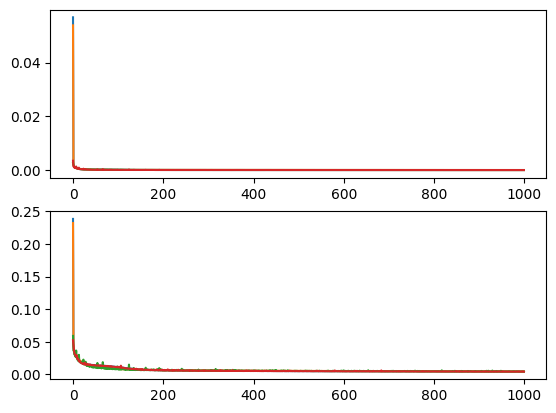

In [121]:
fig, ax = plt.subplots(2,1)

ax[0].plot(history.history['loss'])
ax[0].plot(history_2.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].plot(history_2.history['val_loss'])

ax[1].plot(history.history['root_mean_squared_error'])
ax[1].plot(history_2.history['root_mean_squared_error'])

ax[1].plot(history_2.history['val_root_mean_squared_error'])
ax[1].plot(history.history['val_root_mean_squared_error'])



In [122]:
y_pred = model.predict(x_test)
y_pred_2 = model_2.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [123]:
FLT_1_Sigmoid = DataFrame(y_pred, columns=['aoa','pitch','pitch speed','cd','cl','cm'])

In [124]:
FLT_1_Tanh = DataFrame(y_pred_2, columns=['aoa','pitch','pitch speed','cd','cl','cm'])


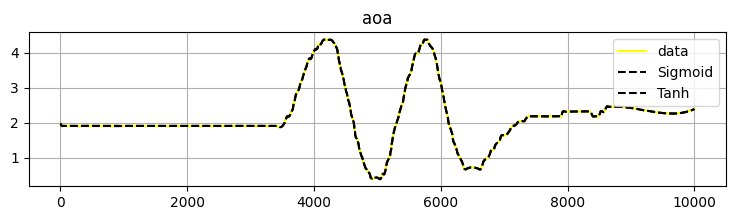

In [125]:
plt.figure(figsize=(9,2))
plt.grid()

aoa = y_pred[:, 0]
aoa_2 = y_pred_2[:, 0]

plt.plot(y_test[:,0], 'yellow', label = "data")
plt.plot(aoa, 'k--', label = "Sigmoid")
plt.plot(aoa_2, 'k--', label = "Tanh")

plt.title ("aoa")
plt.legend()
plt.show()


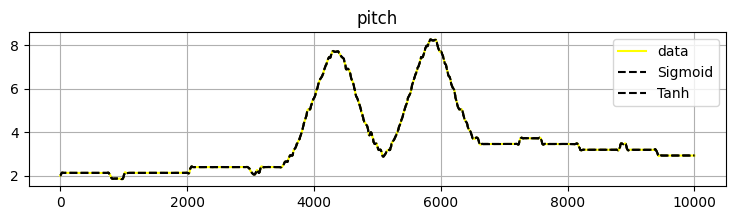

In [126]:
plt.figure(figsize=(9,2))
plt.grid()
Pitch = y_pred[:, 1]
Pitch_2 = y_pred_2[:, 1]

plt.plot(y_test[:,1], 'yellow', label = "data")
plt.plot(Pitch,'k--', label = "Sigmoid")
plt.plot(Pitch_2,'k--', label = "Tanh")

plt.title ("pitch")
plt.legend()
plt.show()

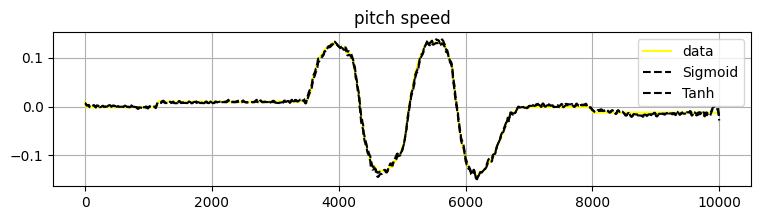

In [127]:
plt.figure(figsize=(9,2))
plt.grid()
Ps = y_pred[:, 2]
Ps_2 = y_pred_2[:, 2]
plt.plot(y_test[:, 2], 'yellow', label = "data")
plt.plot(Ps,'k--', label = "Sigmoid")
plt.plot(Ps_2,'k--', label = "Tanh")

plt.title ("pitch speed")
plt.legend()
plt.show()



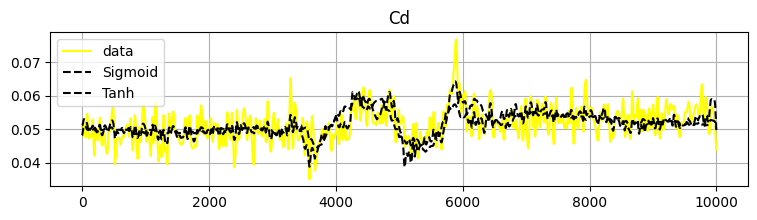

In [128]:
plt.figure(figsize=(9,2))
plt.grid()
Cd = y_pred[:, 3]
Cd_2 = y_pred_2[:, 3]

plt.plot(y_test[:,3], 'yellow', label = "data")
plt.plot(Cd,'k--', label = "Sigmoid")
plt.plot(Cd_2,'k--', label = "Tanh")

plt.title ("Cd")
plt.legend()
plt.show()


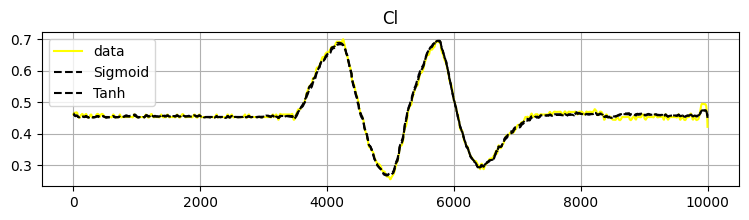

In [129]:
plt.figure(figsize=(9,2))
plt.grid()

Cl = y_pred[:, 4]
Cl_2 = y_pred_2[:, 4]

plt.plot(y_test[:,4], 'yellow', label = "data")
plt.plot(Cl, 'k--', label = "Sigmoid")
plt.plot(Cl_2, 'k--', label = "Tanh")

plt.title ("Cl")
plt.legend()
plt.show()


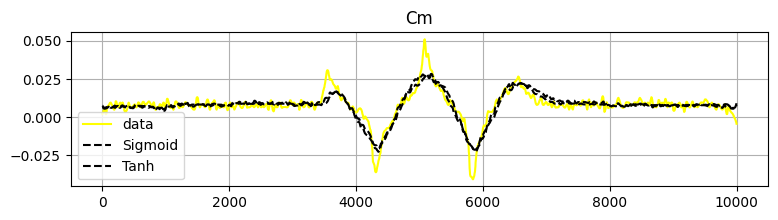

In [130]:
plt.figure(figsize=(9,2))
plt.grid()
Cm = y_pred[:, 5]
Cm_2 = y_pred_2[:, 5]

plt.plot(y_test[:,5], 'yellow', label = "data")
plt.plot(Cm, 'k--', label = "Sigmoid")
plt.plot(Cm_2, 'k--', label = "Tanh")

plt.title ("Cm")
plt.legend()
plt.show()


In [131]:
print('R-square sigmoid:',r2_score(y_test[:len(data)-1], y_pred))
print('R-square tanh:',r2_score(y_test[:len(data)-1], y_pred_2))


R-square sigmoid: 0.8369743441694787
R-square tanh: 0.8904143573684066
